In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
traindata = 'ZipDigits.train'
testdata = 'ZipDigits.test'

In [3]:
def load_data(name):
    labels = []
    images = []
    with open(name, 'r') as f:
        for row in f:
            row = row.strip().split(' ')
            row=np.array(row).astype(float)
            #print(row.shape)
            
            label=row[0]
            image = row[1:]
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)


images, labels = load_data(traindata)
images = images.reshape(-1, 16, 16)
images = (images+1)/2*255 #mapping from 0 to 255

indselect = (labels == 1) | (labels == 5)
images = images[indselect]
labels = labels[indselect] 


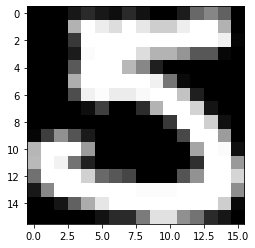

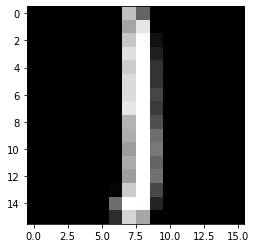

In [4]:
#Plot 2 digits
plt.figure()
plt.imshow(images[0],cmap='gray')
plt.figure()

plt.imshow(images[1],cmap='gray')

(1561, 16, 16)


Text(0, 0.5, 'Vertical Symmetry')

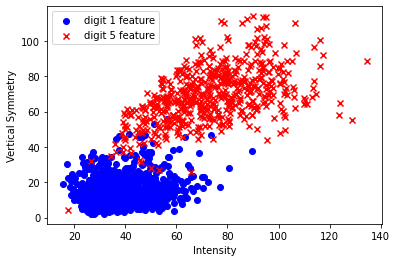

In [5]:
# Extract feature

#intensity
inten = images.reshape(-1, 16*16).mean(axis=-1)

#vertical symmetry
symall=[]
for i in range(len(images)):
    sym1 = np.abs(np.fliplr(images[i]) - images[i])
   
    symall.append(sym1)
symall=np.array(symall)
print(symall.shape) 
sym=symall.reshape(len(images),-1).mean(axis=-1)


#plotting features
i1 = (labels == 1)
i5 = (labels == 5)

plt.figure()

plt.scatter(inten[i1], sym[i1], c='b', marker='o', label='digit 1 feature')
plt.scatter(inten[i5], sym[i5], c='r', marker='x', label='digit 5 feature')
plt.legend()
plt.xlabel('Intensity')
plt.ylabel('Vertical Symmetry')